### Fyzická kondice, AI = artificial intelligence = umělá inteligence, ML = machine learning = strojové učení 
Stáhni si data ze souboru bodyPerformance.csv o fyzické kondici, která byla jihokorejskou organizací Korea Sports Promotion Foundation. Data obsahují různé vstupní hodnoty a výstupní hodnotu, kterou je zařazení jedince do jedné ze čtyř výkonnostních tříd.
https://github.com/pesikj/PythonProDataScience/blob/f56d86b68240a228c5197b75bc5029d85c8f5732/domaci_ukoly/bodyPerformance.csv

- age = věk (20 až 64 let),
- gender = pohlaví (F, M),
- height_cm = výška v cm,
- weight_kg = hmotnost v kg,
- body_fat_% = tělesný tuk v procentech,
- distolic = diastolický krevní tlak (min),
- systolic = systolický krevní tlak (min),
- gripForce = síla stisku,
- sit and bend forward_cm = sed a předklon v cm,
- sit-ups counts = počty sedů-lehů,
- broad jump_cm = skok do dálky v cm,
- class = třída fyzické výkonnosti (4 třídy, A je nejlepší a D nejhorší).

Uvažuj, že chceš přijímat lidi do organizace, která vyžaduje vysokou fyzickou výkonnost. Tvou snahou je zkrátit a zefektivnit přijímací proces. Zkus tedy zjistit, nakolik přesné je zařazení jedinců do výkonnostních tříd bez nutnosti měření jejich výkoknu při vykonání jednotlivých cviků. Využij tedy všechny vstupní proměnné s výjimkou sit and bend forward_cm, sit-ups counts a broad jump_cm.

- K rozřazení jedinců do skupin využij rozhodovací strom a jeden ze zbývajících dvou algoritmů probíraných na lekcích (tj. K Nearest Neighbours nebo Support Vector Machine). Rozhodovacímu stromu omez maximální počet pater na 5 a poté si zobraz graficky a vlož ho do Jupyter notebooku nebo jako obrázek ve formátu PNG jako součást řešení.
- Vytvoř matici záměn pro rozhodovací strom. Kolik jedinců s nejvyšší fyzickou výkonností (tj. ze skupiny A) bylo klasifikování správně? Kolik pak bylo zařazeno do skupin B, C a D? Uveď výsledky do komentáře v programu nebo do buňky v Jupyter notebooku.
- Urči metriku accuracy pro rozhodovací strom a pro jeden ze dvou vybraných algoritmů. Který algoritmus si vedl lépe? Odpověď napiš do komentáře.
- Nyní uvažuj, že se rozhodneš testovat jedince pomocí jednoho ze cviků. Vyber cvik, který dle tebe nejvíce vypovídá o fyzické výkonnosti jedince. Porovnej, o kolik se zvýšila hodnota metriky accuracy pro oba algoritmy.

In [291]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data
# from sklearn.preprocessing import StandardScaler
import numpy
from sklearn.neighbors import KNeighborsClassifier

import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

data = pandas.read_csv("ukol_05-bodyPerformance.csv")
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [292]:
# Rozdělení dat na vstupní proměnné a cílovou klasifikaci
  
y = data["class"]

categorical_columns = ["gender"]
numeric_columns = ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce"]
numeric_data = data[numeric_columns].to_numpy()

encoder = OneHotEncoder()                                               #  vytváří dva sloupečky obrácených k sobě s 0 a 1 (muž = 0 v prvním sloupci, 1 ve druhém sloupci)
encoded_columns = encoder.fit_transform(data[categorical_columns])      # použiji OneHotEncoder na ten vstupní sloupec "gender"
encoded_columns = encoded_columns.toarray()                             # převod na pole/matici (kde mohu mít jen čísla převážně)

X = numpy.concatenate([encoded_columns,numeric_data], axis=1)           # spojení obou polí dohromady po řádku (axis=1)
X

array([[  0. ,   1. ,  27. , ...,  80. , 130. ,  54.9],
       [  0. ,   1. ,  25. , ...,  77. , 126. ,  36.4],
       [  0. ,   1. ,  31. , ...,  92. , 152. ,  44.8],
       ...,
       [  0. ,   1. ,  39. , ...,  78. , 132. ,  63.5],
       [  1. ,   0. ,  64. , ...,  68. , 121. ,  19.3],
       [  0. ,   1. ,  34. , ...,  82. , 150. ,  35.9]])

In [293]:
# vypsání názvů výstupních sloupečků

encoder.get_feature_names_out()

array(['gender_F', 'gender_M'], dtype=object)

In [294]:
# Rozdělení dat na trénovací a testovací sadu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### ROZHODOVACÍ STROM

In [295]:
# Založení a natrénování klasifikátoru a otestování klasifikace
clf = DecisionTreeClassifier(max_depth=5)   # 5 pater rozhodovacího stromu
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

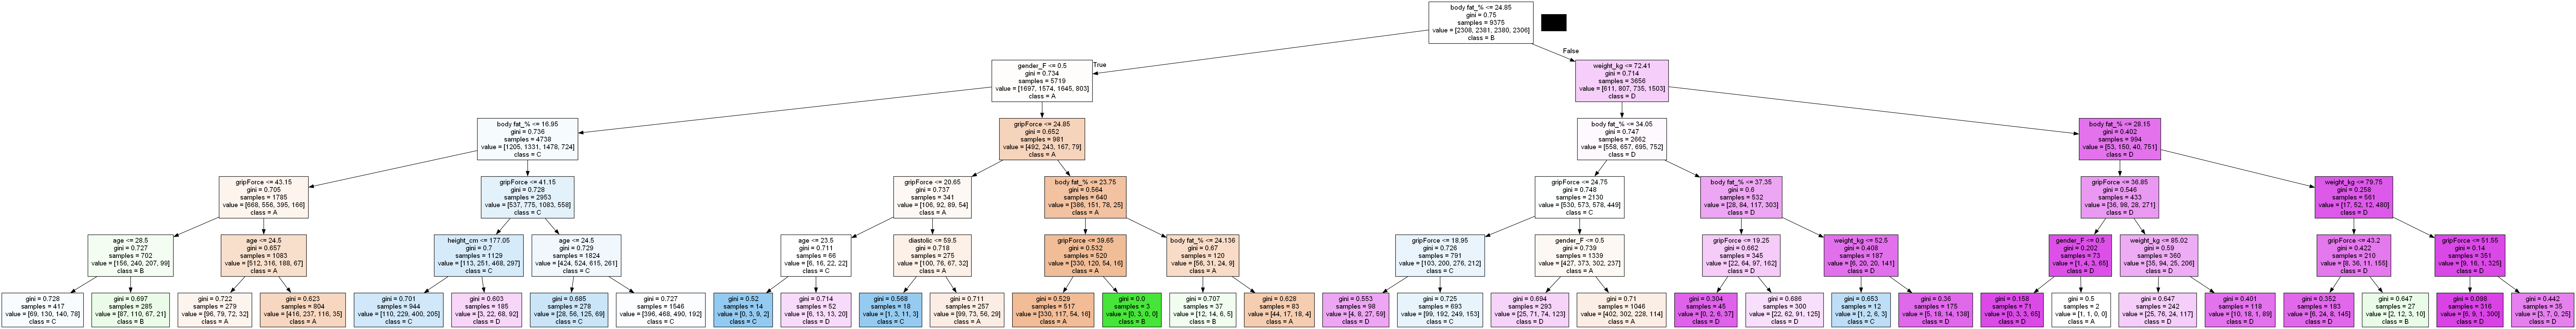

In [296]:
# Vykreslení/zobrazení výsledného stromu

dot_data = StringIO()                                           # vytvoření virutálního souboru
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=list(encoder.get_feature_names_out()) + numeric_columns, class_names=["A", "B", "C", "D"])       
                                                                # export rozhodovacího stromu, filled=True (vyplněný barvou), feature_names /obs.názvy sloupců), classes_names (obs.názevy tříd)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())      # vytvoření grafické reprezentace
Image(graph.create_png())                                       # vytvoření obrázku

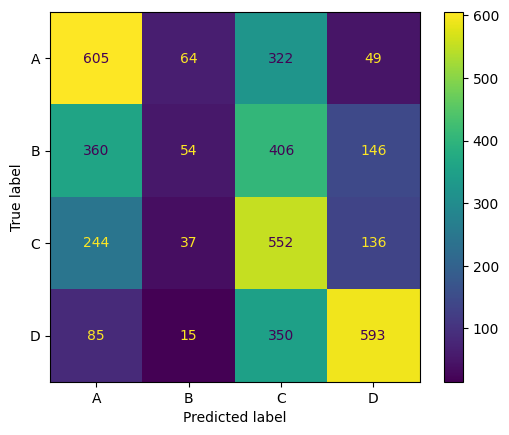

In [297]:
# Matice záměn rozhodovacího stromu
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

# Kolik jedinců s nejvyšší fyzickou výkonností (tj. ze skupiny A) bylo klasifikování správně?
    # Bylo predikováno se správnou fyzickou výkonostní klasifikací třídy A 605 jedinců. Tzn. 605 jedinců bylo predikováno s výkonností třídy A a skutečně 605 jedinců mělo fyzickou výkonnost třídy A 605. (predikce se shoduje se skutečností).
# Kolik pak bylo zařazeno do skupin B, C a D?
    # Správně bylo predikováno s fyzickou výkonností třídy B 54 jedinců.
    # Správně bylo predikováno s fyzickou výkonností třídy C 552 jedinců.
    # Správně bylo predikováno s fyzickou výkonností třídy D 593 jedinců.


In [298]:
# Metrika accuracy rozhodovacího stromu
accuracy_score(y_test, y_pred)

# 44,90% (0.4489795918367347)

0.4489795918367347

- Pokračovat KNN nebo Vectory a také vytvořit matici záměn a metriku accuracy

#### KNN = K Nearest Neighbors

In [299]:
y = data["class"]

# Normalizace dat: aby data s vyšším číslem neovlivňovala model více než nízká/mikro čísla.
scaler = StandardScaler()    # z-score
numeric_data = scaler.fit_transform(data[numeric_columns])         # číselné proměnné

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns]) # rozdělení na 2 sloupce 0 a 1 pro kategorickou proměnnou = gender
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)
X

array([[ 0.        ,  1.        , -0.71743212, ...,  0.1120089 ,
        -0.01595937,  1.68819029],
       [ 0.        ,  1.        , -0.8642197 , ..., -0.16727827,
        -0.28782032, -0.05307347],
       [ 0.        ,  1.        , -0.42385695, ...,  1.22915757,
         1.47927584,  0.7375544 ],
       ...,
       [ 0.        ,  1.        ,  0.16329338, ..., -0.07418255,
         0.1199711 ,  2.49764263],
       [ 1.        ,  0.        ,  1.99813815, ..., -1.00513978,
        -0.6276465 , -1.66256592],
       [ 0.        ,  1.        , -0.20367558, ...,  0.29820034,
         1.34334536, -0.10013466]])

In [300]:
# vypsání názvů výstupních sloupečků

encoder.get_feature_names_out()

array(['gender_F', 'gender_M'], dtype=object)

In [304]:
# Trénování modelu (fit)
X_train = scaler.fit_transform(X)    # ne X_train = scaler.fit_transform(X_train). Chci použít místo X_train znormalizované X
X_test = scaler.transform(X)         # ne X_test = scaler.transform(X_train). Chci použít místo X_train znormalizované X
X_train

array([[-0.76275036,  0.76275036, -0.71743212, ...,  0.1120089 ,
        -0.01595937,  1.68819029],
       [-0.76275036,  0.76275036, -0.8642197 , ..., -0.16727827,
        -0.28782032, -0.05307347],
       [-0.76275036,  0.76275036, -0.42385695, ...,  1.22915757,
         1.47927584,  0.7375544 ],
       ...,
       [-0.76275036,  0.76275036,  0.16329338, ..., -0.07418255,
         0.1199711 ,  2.49764263],
       [ 1.31104493, -1.31104493,  1.99813815, ..., -1.00513978,
        -0.6276465 , -1.66256592],
       [-0.76275036,  0.76275036, -0.20367558, ...,  0.29820034,
         1.34334536, -0.10013466]])

In [305]:
# Výběr klasifikátoru (KNN)
clf_2 = KNeighborsClassifier()    # bez definovaného argumentu n_neighbors = metoda použije výchozí hodnotu n_neighbors=5. Bere tedy napevno 5 sousedů.

# Natrénování na trénovacích datech
clf_2.fit(X_train, y_train)

# Predikce z testovacích dat
y_pred = clf_2.predict(X_test)    # vytvoření nového bodu uprostřed (na obrázku z lekce je ten čtverečkovaný)


# Zobrazení Confusion matrix KNN
ConfusionMatrixDisplay.from_estimator(clf_2, X_test, y_test, display_labels=clf.classes_) 

# Kolik jedinců s nejvyšší fyzickou výkonností (tj. ze skupiny A) bylo klasifikování správně?
    # Bylo predikováno se správnou fyzickou výkonostní klasifikací třídy A 601 jedinců. Tzn. 605 jedinců bylo predikováno s výkonností třídy A a skutečně 601 jedinců mělo fyzickou výkonnost třídy A 601. (predikce se shoduje se skutečností).
# Kolik pak bylo zařazeno do skupin B, C a D?
    # Správně bylo predikováno s fyzickou výkonností třídy B 303 jedinců.
    # Správně bylo predikováno s fyzickou výkonností třídy C 295 jedinců.
    # Správně bylo predikováno s fyzickou výkonností třídy D 449 jedinců.

ValueError: Found input variables with inconsistent numbers of samples: [13393, 9375]

In [ ]:
# Metrika accuracy KNN
accuracy_score(y_test, y_pred)

# 41.02 % (0.4101543056246889)

0.4101543056246889

- nalezení optimální počtu sousedů KNN pomocí cyklu a metriky accuracy

In [306]:
# Nalezení optimálního počtu sousedů

import matplotlib.pyplot as plt

display(accuracy_score(y_test, y_pred))

# Příprava testovaných hodnot počtu sousedů (k)
# (čísla od 1 do 30 včetně, pouze lichá)
# budu zvětšovat nebo změnšovat ten kroužek (v obrázku výše)
ks = range(1, 41, 2)    # číslo 2 znamená, že bude skákat ob číslo = beru každé druhé. Tj. budu vždy lichá
                        # číslo 1 je začnu od 1 nejbližšího souseda k bodu. 
accuracy_scores = []

# Predikce a accuracy score pro každou testovanou hodnotu
for k in ks:            # číslo 1 je začnu od 1 nejbližšího souseda k bodu. A postupně se tento kruh zvětšuje (počet bodů v kruhu je vyšší, 1, pak 3 body, pak 5 bodů apod. Ob jedno.)
    clf2b = KNeighborsClassifier(n_neighbors=k)
    clf2b.fit(X_train, y_train)
    y_pred = clf2b.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Graf
plt.plot(ks, accuracy_scores)   # ks je osa X
plt.xlabel("Number of neighbors used")
plt.ylabel("Accuracy")
plt.grid()

# Dle grafu nejlepší metriky accuracy dosahuje při 15 sousedech. 

clf_2b = KNeighborsClassifier(n_neighbors = 15)    # metoda vezme 15 sousedů, které jsem mu nadefinovala dle grafu

# Natrénování na trénovacích datech
clf_2b.fit(X_train, y_train)

# Predikce z testovacích dat
y_pred = clf_2b.predict(X_test)    # vytvoření nového bodu uprostřed (na obrázku z lekce je ten čtverečkovaný)


# Zobrazení Confusion matrix KNN
ConfusionMatrixDisplay.from_estimator(clf_2, X_test, y_test, display_labels=clf.classes_) 

ValueError: Found input variables with inconsistent numbers of samples: [4018, 9375]

- nalezení optimální počtu sousedů KNN GridSearch a metriky accuracy

In [ ]:
# Nalezení optimálního počtu sousedů přes GridSearchCV

model_3 = KNeighborsClassifier()
params_3 = {"n_neighbors": range(1, 41, 2)}

# Otestování klasifikátorů se všemi kombinacemi parametrů
# CV: Cross-Validation
clf_3 = GridSearchCV(model_3, params_3, scoring="accuracy")
clf_3.fit(X_train, y_train)

# Zobrazení parametrů a skóre nejlepšího klasifikátoru
print(clf_3.best_params_)
print(f"Best accuracy: {round(clf_3.best_score_*100, 2)} %")
# ... zaokrouhlení na dvě desetinná místa

{'n_neighbors': 37}
Best accuracy: 44.65 %


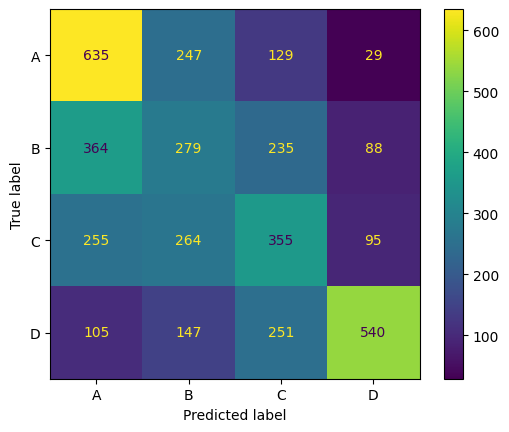

In [ ]:
# Predikce z testovacích dat
y_pred = clf_3.predict(X_test)    # vytvoření nového bodu uprostřed (na obrázku z lekce je ten čtverečkovaný)
#  proč se zdá, že není potřeba tento krok? "y_pred = clf_3.predict(X_test) " když vynechám čísla zůstanou stejná?

# Zobrazení Confusion matrix KNN
ConfusionMatrixDisplay.from_estimator(clf_3, X_test, y_test, display_labels=clf.classes_) 


### SUPPORT VECTOR MACHINE (SVM)

 - nalezení optimální hodnoty accuracy skóre a metoda lineání/rbf

In [ ]:
from sklearn.svm import SVC

# Rozdělení dat na vstupní a výstupní proměnné (cílovou klasifikaci) - není třeba rozdělovat, protože už jsou rozdělené z předchozího kroku?
# X1 = data1.drop(columns=["species"])  
# y1 = data1["species"]

# Nalezení nejlepší metriky

# Vytvoření klasifikátoru SVC (Support Vector Classification) a slovníku s parametry k otestování
# OVO: One-vs-One
# OVR: One-vs-Rest
# RBF: Radial Basis Function
model_4 = SVC()
params_4 = {"kernel": ["linear", "rbf"], "decision_function_shape": ["ovo", "ovr"]}

# Otestování klasifikátorů se všemi kombinacemi parametrů
# CV: Cross-Validation
clf_4 = GridSearchCV(model_4, params_4, scoring="accuracy")
clf_4.fit(X_train, y_train)

# Zobrazení parametrů a skóre nejlepšího klasifikátoru
print(clf_4.best_params_)
print(f"Best accuracy: {round(clf_4.best_score_, 2)*100} %")
# ... zaokrouhlení na dvě desetinná místa

{'decision_function_shape': 'ovo', 'kernel': 'rbf'}
Best accuracy: 47.0 %


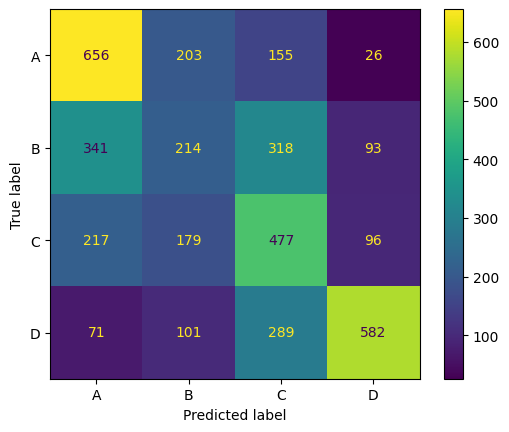

In [ ]:
# Predikce z testovacích dat
y_pred = clf_4.predict(X_test)    # vytvoření nového bodu uprostřed (na obrázku z lekce je ten čtverečkovaný)
#  proč se zdá, že není potřeba tento krok? "y_pred = clf_3.predict(X_test) " když vynechám čísla zůstanou stejná?

# Zobrazení Confusion matrix KNN
ConfusionMatrixDisplay.from_estimator(clf_4, X_test, y_test, display_labels=clf.classes_) 

# Kolik jedinců s nejvyšší fyzickou výkonností (tj. ze skupiny A) bylo klasifikování správně?
    # Bylo predikováno se správnou fyzickou výkonostní klasifikací třídy A 656 jedinců. Tzn. 656 jedinců bylo predikováno s výkonností třídy A a skutečně 601 jedinců mělo fyzickou výkonnost třídy A 656. (predikce se shoduje se skutečností).
# Kolik pak bylo zařazeno do skupin B, C a D?
    # Správně bylo predikováno s fyzickou výkonností třídy B 214 jedinců.
    # Správně bylo predikováno s fyzickou výkonností třídy C 477 jedinců.
    # Správně bylo predikováno s fyzickou výkonností třídy D 582 jedinců.

Nejlepší metriky accuracy skóre = 47% dosáhne model s One vs One Support Vector Machine a RBF kernelem.

### Nyní uvažuj, že se rozhodneš testovat jedince pomocí jednoho ze cviků.
- sit and bend forward_cm = sed a předklon v cm

In [ ]:
# Rozdělení dat na vstupní proměnné a cílovou klasifikaci
  
y = data["class"]

categorical_columns = ["gender"]
numeric_columns = ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce", "sit and bend forward_cm"]
numeric_data = data[numeric_columns].to_numpy()

encoder = OneHotEncoder()                                               #  vytváří dva sloupečky obrácených k sobě s 0 a 1 (muž = 0 v prvním sloupci, 1 ve druhém sloupci)
encoded_columns = encoder.fit_transform(data[categorical_columns])      # použiji OneHotEncoder na ten vstupní sloupec "gender"
encoded_columns = encoded_columns.toarray()                             # převod na pole/matici (kde mohu mít jen čísla převážně)

X = numpy.concatenate([encoded_columns,numeric_data], axis=1)           # spojení obou polí dohromady po řádku (axis=1)
X

array([[  0. ,   1. ,  27. , ..., 130. ,  54.9,  18.4],
       [  0. ,   1. ,  25. , ..., 126. ,  36.4,  16.3],
       [  0. ,   1. ,  31. , ..., 152. ,  44.8,  12. ],
       ...,
       [  0. ,   1. ,  39. , ..., 132. ,  63.5,  16.4],
       [  1. ,   0. ,  64. , ..., 121. ,  19.3,   9.2],
       [  0. ,   1. ,  34. , ..., 150. ,  35.9,   7.1]])

In [ ]:
# Rozdělení dat na trénovací a testovací sadu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Rozhodovací strom

In [ ]:
# Založení a natrénování klasifikátoru a otestování klasifikace
clf = DecisionTreeClassifier(max_depth=5)   # 5 pater rozhodovacího stromu
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Metrika accuracy rozhodovacího stromu
accuracy_score(y_test, y_pred)

# 57,86% (0.5786460925833748)

0.5786460925833748

- KNN (K Nearest Neighbors)

In [ ]:
y = data["class"]

scaler = StandardScaler()    # z-score
numeric_data = scaler.fit_transform(data[numeric_columns])         # číselné proměnné

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns]) # rozdělení na 2 sloupce 0 a 1 pro kategorickou proměnnou = gender
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)
X

array([[ 0.        ,  1.        , -0.71743212, ..., -0.01595937,
         1.68819029,  0.37731734],
       [ 0.        ,  1.        , -0.8642197 , ..., -0.28782032,
        -0.05307347,  0.12898358],
       [ 0.        ,  1.        , -0.42385695, ...,  1.47927584,
         0.7375544 , -0.37950936],
       ...,
       [ 0.        ,  1.        ,  0.16329338, ...,  0.1199711 ,
         2.49764263,  0.14080899],
       [ 1.        ,  0.        ,  1.99813815, ..., -0.6276465 ,
        -1.66256592, -0.71062104],
       [ 0.        ,  1.        , -0.20367558, ...,  1.34334536,
        -0.10013466, -0.9589548 ]])

In [ ]:
# Normalizace dat: aby data s vyšším číslem neovlivňovala model více než nízká/mikro čísla
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.30599682, -1.30599682,  0.81160832, ...,  0.45822559,
        -0.55589866,  1.0644014 ],
       [ 1.30599682, -1.30599682, -1.15993114, ..., -0.62991882,
        -0.58419419,  1.40894525],
       [-0.76569865,  0.76569865, -1.15993114, ...,  1.81840611,
         0.72683203, -0.51574795],
       ...,
       [ 1.30599682, -1.30599682, -0.72181126, ..., -0.96996395,
        -1.10294558,  0.73173838],
       [ 1.30599682, -1.30599682, -1.15993114, ...,  0.52623462,
        -1.44249194,  0.60104934],
       [-0.76569865,  0.76569865, -1.08691116, ..., -1.58204518,
         0.1326259 ,  0.17333974]])

In [ ]:
# Výběr klasifikátoru (KNN)
clf_2 = KNeighborsClassifier()

# Natrénování na trénovacích datech
clf_2.fit(X_train, y_train)

# Predikce z testovacích dat
y_pred = clf_2.predict(X_test)    # vytvoření nového bodu uprostřed (na obrázku z lekce je ten čtverečkovaný)


In [ ]:
# Nalezení optimálního počtu sousedů přes GridSearchCV

model_2 = KNeighborsClassifier()
params_2 = {"n_neighbors": range(1, 41, 2)}

# Otestování klasifikátorů se všemi kombinacemi parametrů
# CV: Cross-Validation
clf_2 = GridSearchCV(model_3, params_3, scoring="accuracy")
clf_2.fit(X_train, y_train)

# Zobrazení parametrů a skóre nejlepšího klasifikátoru
print(clf_2.best_params_)
print(f"Best accuracy: {round(clf_2.best_score_*100, 2)} %")
# ... zaokrouhlení na dvě desetinná místa

# {'n_neighbors': 39}
# Best accuracy: 56.79 %

{'n_neighbors': 39}
Best accuracy: 56.79 %


- SVM (Support Vector Machine)

In [ ]:
# Vytvoření klasifikátoru SVC (Support Vector Classification) a slovníku s parametry k otestování
# OVO: One-vs-One
# OVR: One-vs-Rest
# RBF: Radial Basis Function
model_4 = SVC()
params_4 = {"kernel": ["linear", "rbf"], "decision_function_shape": ["ovo", "ovr"]}

# Otestování klasifikátorů se všemi kombinacemi parametrů
# CV: Cross-Validation
clf_4 = GridSearchCV(model_4, params_4, scoring="accuracy")
clf_4.fit(X_train, y_train)

# Zobrazení parametrů a skóre nejlepšího klasifikátoru
print(clf_4.best_params_)
print(f"Best accuracy: {round(clf_4.best_score_, 2)*100} %")
# ... zaokrouhlení na dvě desetinná místa


# {'decision_function_shape': 'ovo', 'kernel': 'rbf'}
#Best accuracy: 61.0 %

{'decision_function_shape': 'ovo', 'kernel': 'rbf'}
Best accuracy: 61.0 %


Nejlepší accuracy skóre je 61% a tedy nejlépe zvoleným modelem pro tento úkol je SVM (Supoort Vector Machine), One vs One, RBF alespoň s jednou proměnnou fyzické výkonnosti jedince (sed a předklon v cm). 

V porovnání s nejlepší hodnotou metriky accuracy skóre (47%) bez této proměnné fyzické výkonnosti, se jedná o 14% nárůst. Model se "sedem a předkolem v cm" má o 14% lepší odhad skutečné fyzické výkonnosti než bez této proměnné fyzické výkonnosti jedince. 

Otázka: Znám nyní nejlepší model pro predikci fyzické výkonnosti při náboru (61% accuracy, model SVM OVO, RBF) se potřebou změřit alespoň sed a předklon v cm. Ale co s tím dál? :-) Pak bychom při náboru získali další soubor a prohnali to tímto modelem? Stejným způsobem nebo se to pak dělá jinak? Stačí co nejjednodušeji a teoreticky, pokud to není příliš komplikované :-) .

Odpověď Martina: Nevím, jaké jsou plány Korejské sportovní asociace:), ale představuju si to následovně: Připravíš optimální model a třeba ho převedeš do nějaké použitelnější formy (aplikace, webová stránka, apod.). Lidi z asociace pak udělají přijímačky, zadají výsledky kandidátů do aplikace a model jim ukáže jejich výkonnostní třídu místo toho, aby to nějak měřili nebo to určovali lidští experti. Tím se určitě ušetří hromada peněz a času:). V téhle fázi už se model nijak netrénuje - jen vezme data na vstupu (třeba jen od jednoho člověka) a klasifikuje je do výkonnostní třídy jakožto výstup. Neboli neprovádí se fit() a ostatní části, ale už jen predict().